# Selección de modelos y evaluación

- Cómo medimos si un modelo está "bien" entrenado
- Flujo general de trabajo en ML
- Basado en ESL parte 7 Selección y evaluación de modelos.

## Versión b.1

El notebook lo puedo modificar, esta versión es la b.1 a 14/06/2024 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Evaluación de modelos

Nuestro objetivo siempre ha sido conseguir una función $f$ pero, hasta el momento, no hemos hablado sobre medir qué tan buena es.

El objetivo principal si bien es conseguir una $f$ debe cambiar a **una $f$ buena**. Intuitivamente, una función $f$ funciona bien si es capaz de **generalizar** sobre datos independientes o no vistos.



## Resumen de dónde estamos

1. Variable objetivo $Y \in \mathbb{R}$,
1. Un vector de entradas $X \in \mathbb{R}^p$
1. Un modelo de predicción $\hat{f}(X)$ que se ha estimado a partir de un conjunto de entrenamiento $\mathcal{T}$.
1. La función de pérdida para medir errores entre $Y$ y $\hat{f}(X)$ se denota por $L(Y, \hat{f}(X))$.

 Las selecciones típicas son:
$$
L(Y, \hat{f}(X))= \begin{cases}(Y-\hat{f}(X))^2 & \text { squared error } \\ |Y-\hat{f}(X)| & \text { absolute error. }\end{cases}
$$

## Definiciones

## Error de prueba

También conocido como error de generalización, es el error de predicción sobre una muestra de prueba independiente.
$$
\operatorname{Err}_{\mathcal{T}}=\mathrm{E}[L(Y, \hat{f}(X)) \mid \mathcal{T}]
$$

1. $X$ como $Y$ se extraen aleatoriamente de su distribución conjunta (población).
1. Aquí el conjunto de entrenamiento $\mathcal{T}$ es fijo
1. El error de prueba se refiere al error de este conjunto de entrenamiento específico.

## Error de entrenamiento

El error de entrenamiento, es el promedio de la función de pérdida sobre los datos de entrenamiento $\mathcal{T}$.
$$
\overline{\mathrm{err}}=\frac{1}{N} \sum_{i=1}^N L\left(y_i, \hat{f}\left(x_i\right)\right) .
$$

-----

## Error de predicción _esperado_

Error de predicción esperado (o error de prueba esperado)
$$
\operatorname{Err}=\mathrm{E}[L(Y, \hat{f}(X))]=\mathrm{E}\left[\operatorname{Err}_{\mathcal{T}}\right ]
$$

Tenga en cuenta que esta esperanza promedia todo lo que es aleatorio, incluida la aleatoriedad en el conjunto de entrenamiento que produjo $\hat{f}$.



Veamos esto en la siguiente figura

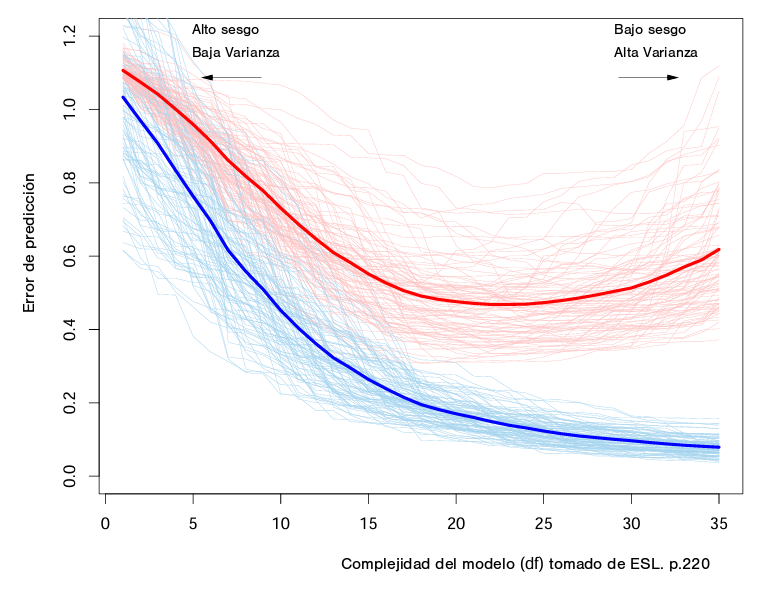

## El objetivo

Aún cuando $\operatorname{Err}$ (Error de prueba _esperado_) es mucho mejor desde el punto de vista estadístico. Nuestro objetivo es estimar $\operatorname{Err}_{\mathcal{T}}$ (error de prueba)

Por qué?

En general, teóricamente se le da importancia al Error de predicción _esperado_ ()  

### Qué sucede con los parámetros de ajuste (_tuning_) ($\lambda$)?

 Normalmente, nuestro modelo tendrá un parámetro o parámetros de ajuste $\alpha$ y, por lo tanto, podemos escribir nuestras predicciones como $$\hat{f}_\lambda(x)$$

 El parámetro de ajuste varía la complejidad de nuestro modelo y deseamos encontrar el valor de $\beta$ que minimice el error, es decir, que produzca el mínimo de la curva de error de prueba promedio en la Figura.

## Selección y evaluación de modelos

1. Selección de modelo: estimar el rendimiento de diferentes modelos para elegir el mejor.

1. Evaluación del modelo: habiendo elegido un modelo final, estimando su error de predicción (error de generalización) sobre nuevos datos.

# Pipeline general de evaluación

1. Separación entrenamiento y prueba (_Train-Test split_)
1. Separación entrenamiento, prueba y validación(_Train-Validation-Test split_)
1. Validación cruzada (_Cross-validation_): Permite evaluar el rendimiento de un estimador.
1. Afinación de hiper-parámetros (_hyper-parameters tunig_): Métodos para conseguir buenos hiper-parámetros que no afectan los estimadores!
1. Métricas y puntuación de métodos (_metrics and scoring_)
1. Curvas de validación:  Validation curves: plotting scores to evaluate models


## 1. Separación entrenamiento | prueba

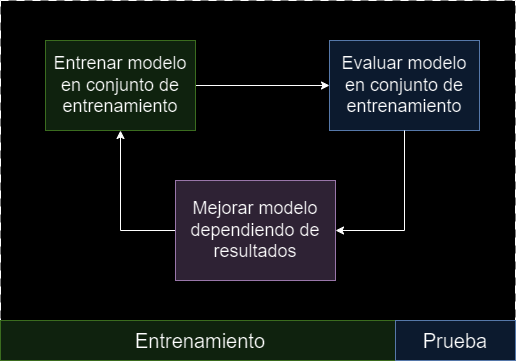

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X, y = np.arange(20).reshape((10, 2)), range(10)

In [ ]:
len(y)

20

In [ ]:
X.shape

(10, 2)

In [ ]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True)

In [ ]:
?train_test_split

In [ ]:
X_train

array([[ 0,  1],
       [ 6,  7],
       [ 2,  3],
       [14, 15],
       [16, 17],
       [10, 11]])

In [ ]:
X_train

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [ ]:
X_train

array([[14, 15],
       [ 4,  5],
       [18, 19],
       [ 8,  9],
       [ 6,  7],
       [12, 13]])

In [ ]:
X_test

array([[16, 17],
       [ 2,  3],
       [10, 11],
       [ 0,  1]])

In [ ]:
y_test

[8, 1, 5, 0]

In [ ]:
y_train

[7, 2, 9, 4, 3, 6]

In [ ]:
y_test

[13, 39, 30, 45, 17, 48, 26, 25, 32, 19, 12, 4, 37, 8, 3, 6, 41]

In [ ]:
X_train

array([[92, 93],
       [94, 95],
       [30, 31],
       [18, 19],
       [32, 33],
       [48, 49],
       [68, 69],
       [62, 63],
       [ 0,  1],
       [88, 89],
       [54, 55],
       [66, 67],
       [10, 11],
       [58, 59],
       [22, 23],
       [72, 73],
       [ 2,  3],
       [42, 43],
       [ 4,  5],
       [86, 87],
       [70, 71],
       [46, 47],
       [80, 81],
       [20, 21],
       [44, 45],
       [36, 37],
       [98, 99],
       [40, 41],
       [14, 15],
       [84, 85],
       [28, 29],
       [56, 57],
       [76, 77]])

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [ ]:
X_train.shape

(30, 2)

Entrenamiento en el conjunto de prueba

data leak

## 2. Separación entrenamiento | validación | prueba

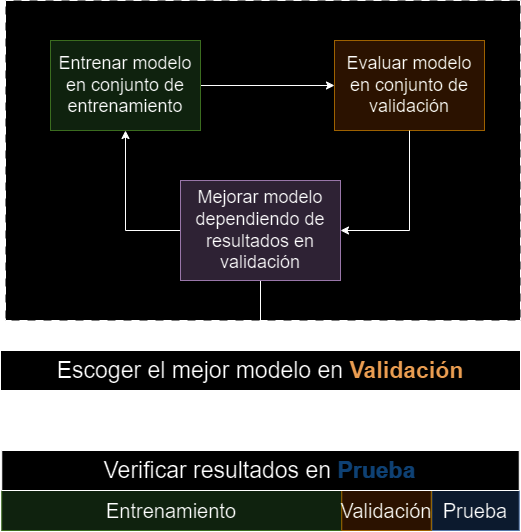

## 3. Validación cruzada (cross-validation)


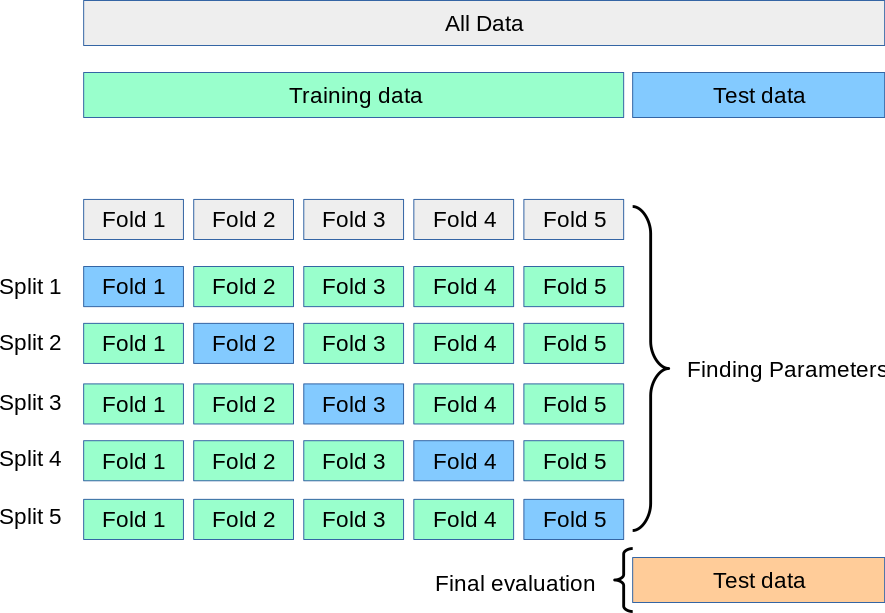

### 3.1 Tipos de validación cruzada

Vamos a tener 3 criterios para crear los folds

1. Queremos conservar el **orden** de los índices?
1. Queremos mantener la **proporción** de las clases?
1. Queremos respetar los **grupos** entre el proceso generador de datos?

Dependiendo de las respuestas a las 3 preguntas, podremos decidir la mejor alternativa.

Existen muchas maneras, en la sección [Cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) de Scikit-Learn explican la mayoría. En nuestro curso, nos vamos a enfocar en las preguntas 1 y 2. A menos que sea indicado, asumimos siempre que la respuesta a 1. es **no**. Para el caso donde 1. es **no** ver la sección **TimeSeriesSplit**.

Para el caso donde 1. es **no** y además **no** consideramos 3., en general nos quedan 2 casos posibles

#### 3.2 Validación cruzada: KFold

Kfold divide los datos de entrenamiento en $K$ pedazos. Para cada _split_, entrenamos nuestro algoritmo y nuestro estimador final será el average de los estimadores de cada _split_

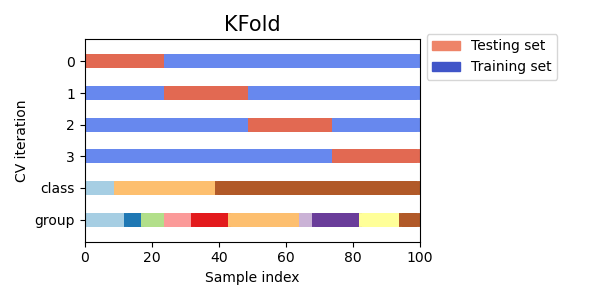

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
kf = KFold(n_splits=3)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Entrenamiento: índices={train_index}")
  print(f"  Prueba:  índices={test_index}")

KFold(n_splits=3, random_state=None, shuffle=False)
Fold 0:
  Entrenamiento: índices=[ 5  6  7  8  9 10 11 12 13]
  Prueba:  índices=[0 1 2 3 4]
Fold 1:
  Entrenamiento: índices=[ 0  1  2  3  4 10 11 12 13]
  Prueba:  índices=[5 6 7 8 9]
Fold 2:
  Entrenamiento: índices=[0 1 2 3 4 5 6 7 8 9]
  Prueba:  índices=[10 11 12 13]


Qué problema conseguimos en el fold 2?

#### 3.3 Validación cruzada: StratifiedKFold

En el caso de que la respuesta de la pregunta 2. sea si, buscamos respetar la proporción de clases dentro de cada _fold_

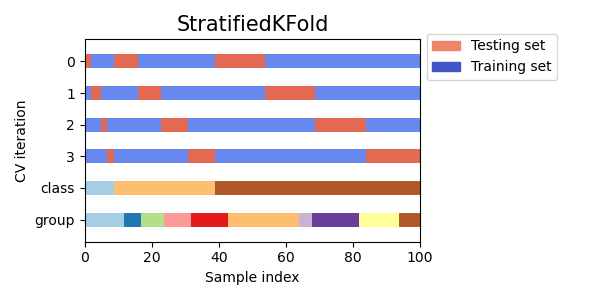

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X.shape

(14, 2)

In [ ]:
skf = StratifiedKFold(n_splits=3)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Entrenamiento: índices={train_index}")
  print(f"  Prueba:  índices={test_index}")

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
Fold 0:
  Entrenamiento: índices=[ 1  2  4  5  9 10 11 12 13]
  Prueba:  índices=[0 3 6 7 8]
Fold 1:
  Entrenamiento: índices=[ 0  2  3  5  6  7  8 12 13]
  Prueba:  índices=[ 1  4  9 10 11]
Fold 2:
  Entrenamiento: índices=[ 0  1  3  4  6  7  8  9 10 11]
  Prueba:  índices=[ 2  5 12 13]


#### Validación cruzada: StratifiedKFold

#### 3.4 Caso especial: series de tiempo

En el caso de series de tiempo, al ser procesos estocásticos el orden de los datos importa. En cuyo caso, la representación es similar a la Figura debajo. Creamos conjuntos de entrenamiento y prueba conservando los índices de nuestros datos.

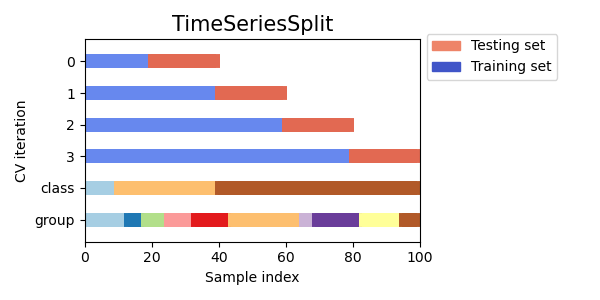

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
for train, test in tscv.split(X):
  print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

#### 3.5 Usando pandas y numpy (sin scikit learn)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
n, m = 25, 4

In [ ]:
X, y = np.arange(n * m).reshape((n, m)), range(n)

In [ ]:
X[0,1:]

array([1, 2, 3])

In [ ]:
df = pd.DataFrame(
    data=X,    # Valores
    index=np.arange(n),    # 1st column as index
    columns=np.arange(m)
)

In [ ]:
df.head()

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])


In [ ]:
validate

,0,1,2,3
24,96,97,98,99
12,48,49,50,51
16,64,65,66,67
0,0,1,2,3
20,80,81,82,83


In [ ]:
train

,0,1,2,3
13,52,53,54,55
7,28,29,30,31
6,24,25,26,27
11,44,45,46,47
4,16,17,18,19
10,40,41,42,43
3,12,13,14,15
2,8,9,10,11
18,72,73,74,75
14,56,57,58,59


# 4. Métricas para regresión

## 4.1 Coficiente de determinación $R^2$




Gráfico tomado de [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

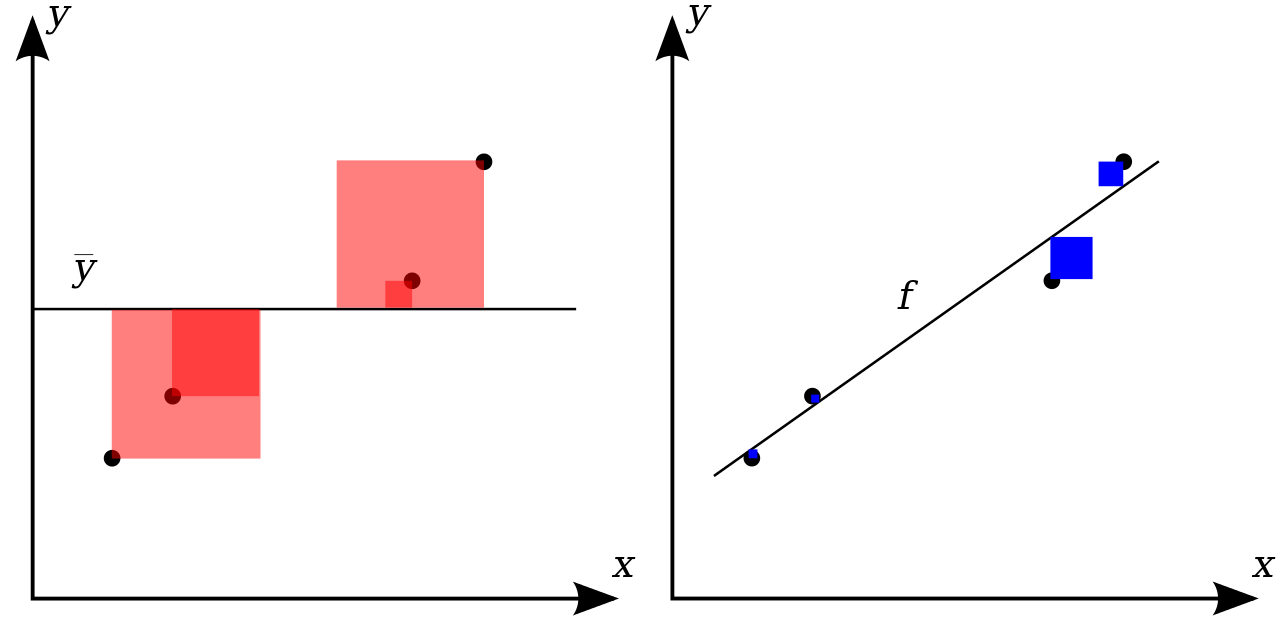

$$R^2=1-\frac{\color{blue}{S S_{\mathrm{res}}}}{\color{red}{S S_{\mathrm{tot}}}}$$

De donde $$\color{blue}{S S_{\mathrm{res}}} = \sum_i\left(y_i-f(x_i)\right)^2=\sum_i e_i^2  $$ y $$\color{red}{S S_{\mathrm{tot}}} = S S_{\mathrm{tot}}=\sum_i\left(y_i-\bar{y}\right)^2 $$

1. Vean como el denominador es **constante** para todos los posibles modelos!
1. Cuáles son los posibles valores de $R^2$



In [ ]:
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
y_true = [1, 2, 3]
y_pred = [1, 2, 3]
r2_score(y_true, y_pred)

1.0

### 4.1.1 Intentemos nosotros

In [ ]:
1 - np.sum((np.array(y_pred)-np.array(y_true))**2)/ np.sum((np.array(y_true)-np.mean(y_true))**2)

-7.0

## 4.2 Coeficiente de correlación

$$ r=\frac{\displaystyle \sum_{x \in X, y\in Y}\left(x-\bar{x}\right)\left(y-\bar{y}\right)}{\sqrt{\displaystyle \sum_{x \in X}\left(x-\bar{x}\right)^2 \sum_{y \in Y}\left(y-\bar{y}\right)^2}}$$

1. Siendo $\bar{x}$ y $\bar{y}$ el average de los vectores $X$ y $Y$
1. $r \in [-1, 1]$
1. 0 implica no correlación.
1. $1$ Implica correlación positiva
1. $-1$ Implica correlación negativa.  

In [ ]:
import scipy

Para nosotros, usamos que $X$ y $Y$ son las predicciones del modelo

In [ ]:
y_true = [1, 2, 3, 4, 5, 6, 7, 8]
y_pred = [1, 5, 3, 3, 5, 6, -7, -5]

In [ ]:
r, p = scipy.stats.pearsonr(y_true, y_pred)

In [ ]:
r

-0.5484416125623885

In [ ]:
p

0.15927063902456506

### 4.2.1 [Fuera de ML] Proba!!


El parámetro $p$ tiene que ver con constraste/test de hipótesis. Lo vimos (o debimos ver) en Probabilidades y estadística!

Parameters:

1. x(N,) array_like Input array.

1. y(N,) array_like Input array.

1. alternative{‘two-sided’, ‘greater’, ‘less’}, optional
  Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:

  - ‘two-sided’: the correlation is nonzero
  - ‘less’: the correlation is negative (less than zero)
  - ‘greater’: the correlation is positive (greater than zero)

In [ ]:
p

0.6801383015910456

### 4.2.2 Cuidado

$r$ es susceptible a valores extremos!!

In [ ]:
y_true = [1, 2, 3, 4, 5, 6, 7, 8]
y_pred = [-1, -2, -3, -4, -5, -6, -7, -8]

r, p = scipy.stats.pearsonr(y_true, y_pred)

In [ ]:
r

-0.9999999999999998

# 5. Métricas de clasificación

## 5.1 Matriz de confusión para clasificación binaria

Basamos nuestra tabla de interés en [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

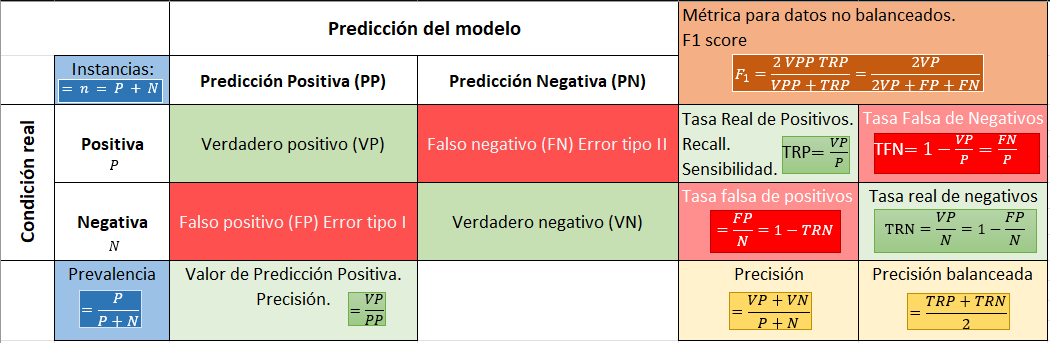

### 5.2 Curvas ROC

Calculemos las métricas para este caso

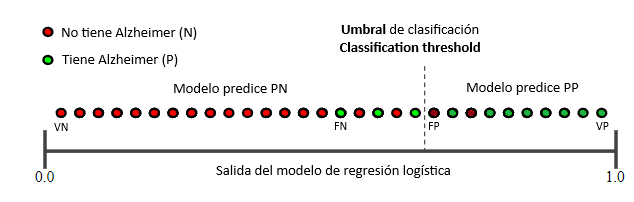

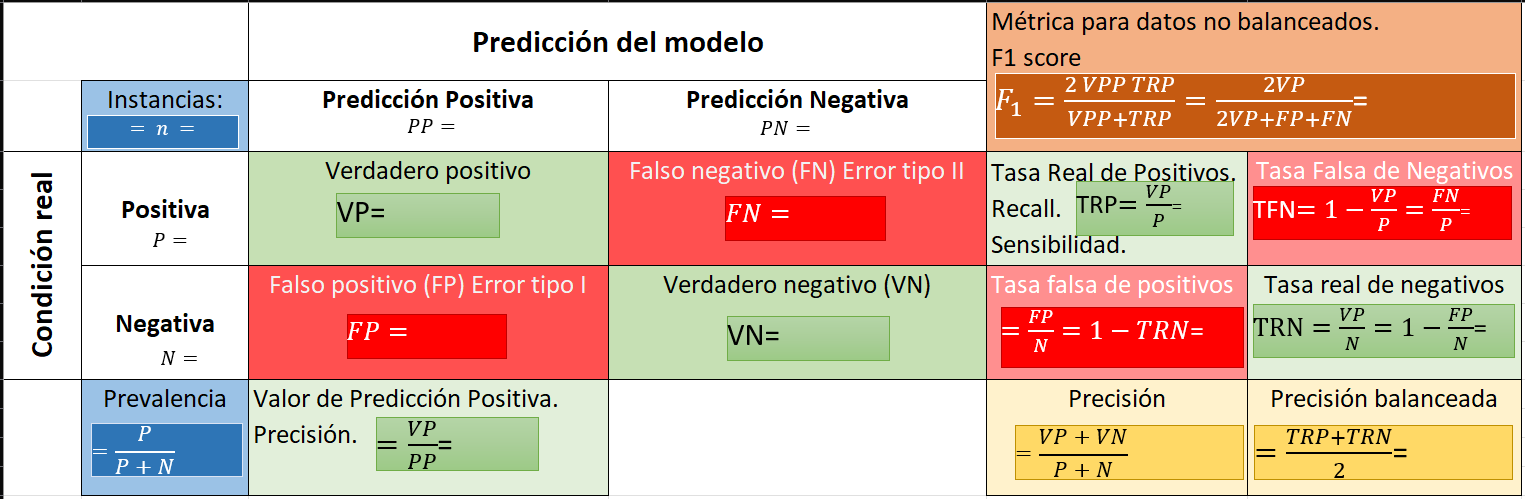

Movamos el umbral

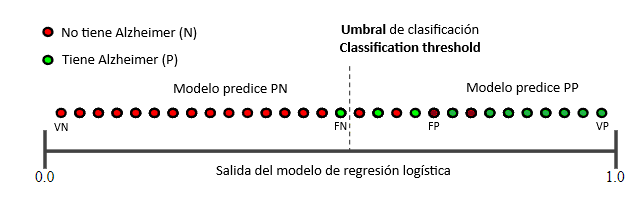

Ahora, casos extremos

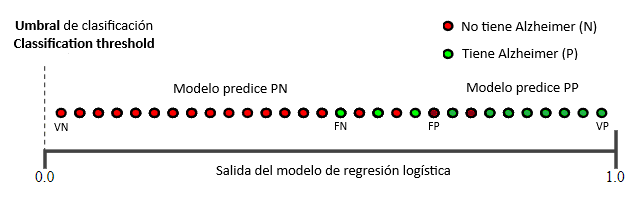

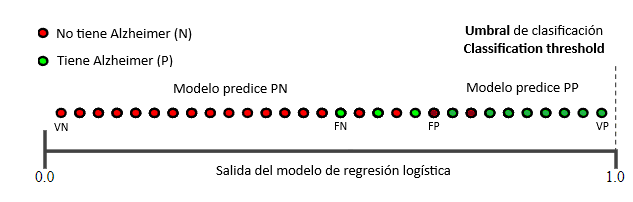

### 5.3 Análisis de curvas ROC

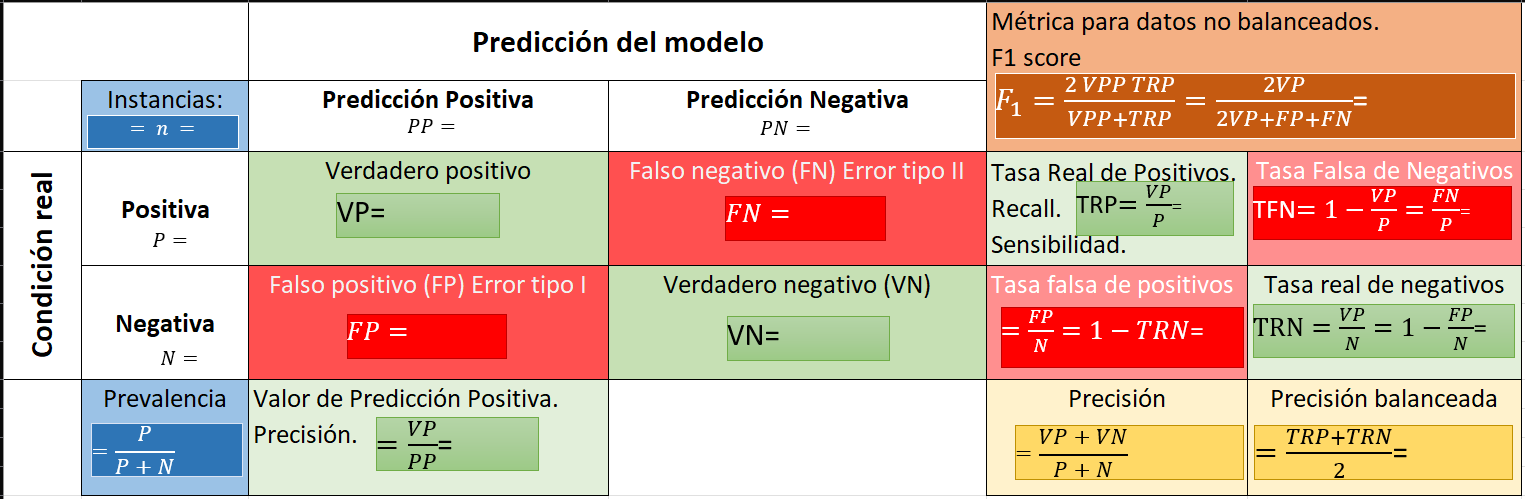

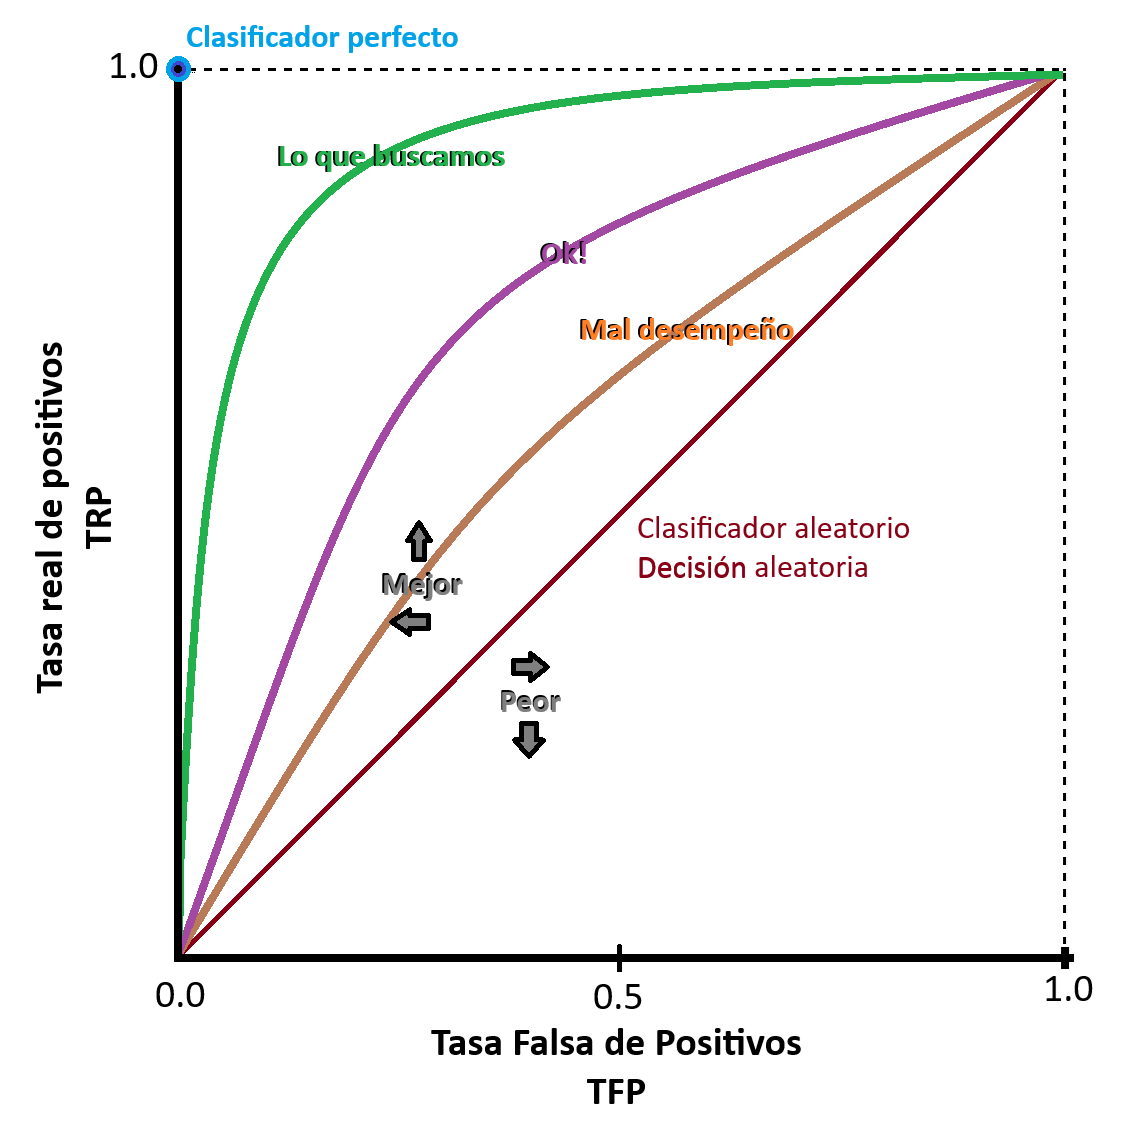

### 5.4 Algoritmo de curvas ROC

Sea **scores** el vector de salida del modelo de regresión para todos los $x$

1. Entrenar modelo deseado con selección deseada.
1. Ordenar scores de mayor a menor.
1. Mover el umbral para cada elemento de scores y crear matriz de confusión.
1. Almacenar TRP y TRN para cada umbral.
1. Gráfico de curva de TRP y TRN

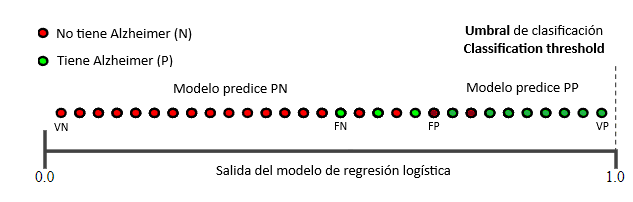



#### 5.4.1 La métrica de ROC

Cuál métrica creen sería idónea dadas las curvas?

En general, usaremos [ROC AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) de scikit learn.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.994767718408118

#### 5.4.2 Cómo ver las curvas ROC?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

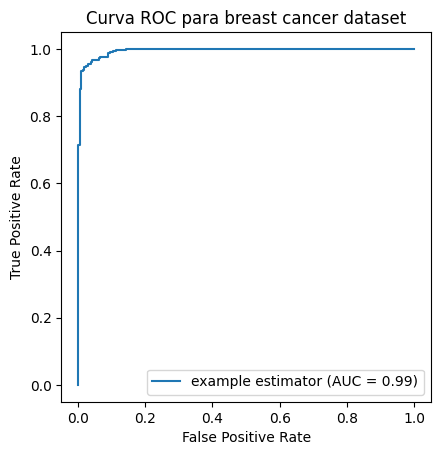

In [ ]:
y = y
pred = clf.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.title("Curva ROC para breast cancer dataset")
plt.axis("square") # Por qué?
plt.show()

### 5.5 Fuera de clasificación binaria

## 5.2 Matriz de confusión con más de 2 clases

Sin embargo, a nivel general la matriz tendrá dimensión $m \times m$ siendo precisión la métrica estándar para todos los casos. Si $Conf$ es la matriz de confusión entonces: $$\text{Precisión} = \frac{tr(Conf)}{P+N} = \frac{\sum_{i \in \left[C \right]}Conf_{ii}}{P+N}  $$

# 6. Afinación de hiper parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [ ]:
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

In [ ]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [ ]:
gs_knn.best_params_



{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}

In [ ]:
# find best model score
gs_knn.score(X_train, y_train)

1.0